In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas
import math

In [20]:
df1 = pandas.read_csv('20200229_154622_Accelerometer.csv') #Front Kick
df2 = pandas.read_csv('20200229_154622_Accelerometer_2.csv', skiprows=4) #RoundHouse
df3 = pandas.read_csv('20200229_154622_Accelerometer_3.csv', skiprows=4) #Side

In [21]:
acc1 = df1['X (mg)']**2 + df1['Y (mg)']**2 + df1['Z (mg)']**2
acc1 = np.sqrt(acc1)
acc2 = df2['X (mg)']**2 + df2['Y (mg)']**2 + df2['Z (mg)']**2
acc2 = np.sqrt(acc2)
acc3 = df3['X (mg)']**2 + df3['Y (mg)']**2 + df3['Z (mg)']**2
acc3 = np.sqrt(acc3)

accX = df['X (mg)']
accY = df['Y (mg)']
accZ = df['Z (mg)']

In [22]:
HostTime = df1['HostTimestamp']
HostTime -= HostTime[0]
HostTime /= 1000

HostTime2 = df2['HostTimestamp']
HostTime2 -= HostTime[0]
HostTime2 /= 1000

acc1=np.array(acc1)/1000
acc2=np.array(acc2)/1000
acc3=np.array(acc3)/1000

HostTime = np.array(HostTime)

In [23]:
duration = int(HostTime[-1])
samples = int(len(HostTime)/duration)
print(duration)

5


In [24]:
Hstime = max(1,2,3)

In [25]:
Hstime

3

plt.plot(HostTime,accX,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration_X [g]')
plt.show()

plt.plot(HostTime,accY,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration_Y [g]')
plt.show()

plt.plot(HostTime,accZ,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration_Z [g]')
plt.show()

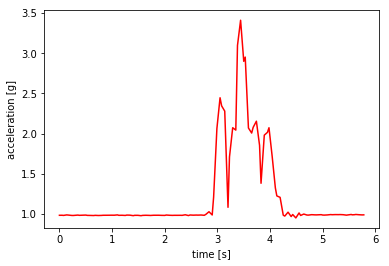

In [26]:
plt.plot(HostTime,acc1,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration [g]')
plt.show()

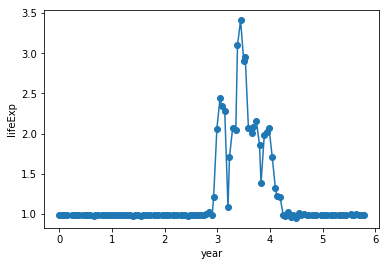

ValueError: x and y must have same first dimension, but have shapes (117,) and (118,)

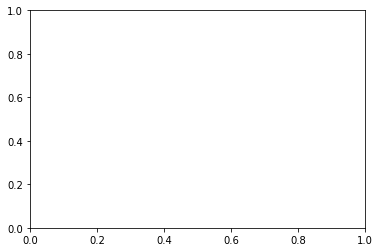

In [27]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(HostTime, acc1, marker="o")
ax.set_xlabel("year")
ax.set_ylabel("lifeExp")
plt.show()

fig,ax2=plt.subplots()
ax2.plot(HostTime, acc2, marker="o")
ax2.set_xlabel("year")
ax2.set_ylabel("lifeExp")
plt.show()

Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\John\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "C:\Users\John\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1753, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-28-49bbe2271262>", line 14, in init
    line1.set_data(HostTime,acc)
NameError: name 'acc' is not defined
MovieWriter ffmpeg unavailable.


IndexError: list index out of range

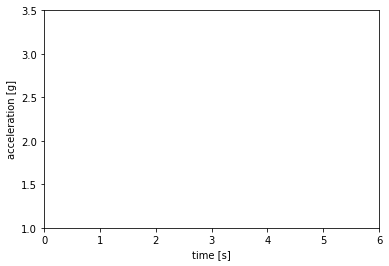

In [28]:


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 6), ylim=(1.0, 3.5))
plt.xlabel('time [s]')
plt.ylabel('acceleration [g]')
line, = ax.plot([], [], 'bo', lw=2)
line1, = ax.plot([], [], 'r--', lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data(HostTime,acc)
    return line, line1

# animation function.  This is called sequentially
def animate(i):
    x = HostTime[i]
    y = acc[i]
    #ax.set_xlim([x[0],x[-1]])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
length = HostTime[-1]
points = len(HostTime)
inter = int(length/points*1000)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=points, interval=50, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('acceleration.mp4', fps=int(points/length), extra_args=['-vcodec', 'libx264'])

plt.show()

In [29]:
inter

49

In [30]:
df2 = pandas.read_csv('20200229_154622_Gyroscope.csv')

In [31]:
GyrX = df2['X (dps)']
GyrY = df2['Y (dps)']
GyrZ = df2['Z (dps)']

In [32]:
HostTime = df2['HostTimestamp']
HostTime -= HostTime[0]
HostTime /= 1000

#acc=np.array(acc)/1000
HostTime = np.array(HostTime)

In [33]:
duration = int(HostTime[-1])
samples = int(len(HostTime)/duration)
print(duration)

5


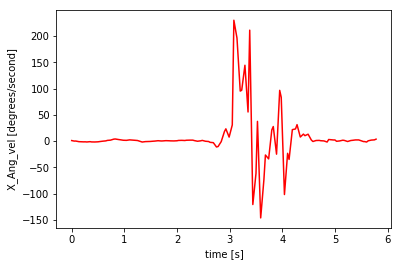

In [34]:
plt.plot(HostTime,GyrX,'r-')
plt.xlabel('time [s]')
plt.ylabel('X_Ang_vel [degrees/second]')
plt.show()

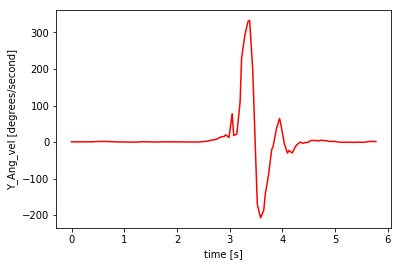

In [35]:
plt.plot(HostTime,GyrY,'r-')
plt.xlabel('time [s]')
plt.ylabel('Y_Ang_vel [degrees/second]')
plt.show()

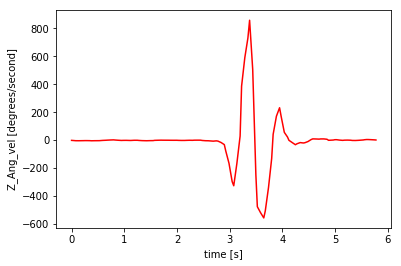

In [36]:
plt.plot(HostTime,GyrZ,'r-')
plt.xlabel('time [s]')
plt.ylabel('Z_Ang_vel [degrees/second]')
plt.show()

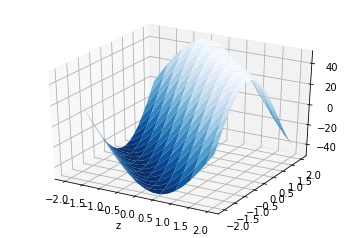

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d

accX = df1['X (mg)']
accY = df1['Y (mg)']
accZ = df1['Z (mg)']

x, y = np.mgrid[-2 : 2 : 20j, -2 : 2 : 20j]
z = 50 * np.sin(x + y)                     # test data
accZ = 50 * np.sin(accX + accY) 
output = plt.subplot(111, projection = '3d')   # 3d projection
#output.plot_surface(accX, accY, accZ, rstride = 2, cstride = 1, cmap = plt.cm.Blues_r)

output.plot_surface(x, y, z, rstride = 2, cstride = 1, cmap = plt.cm.Blues_r)
output.set_xlabel('x')                         # axis label
output.set_xlabel('y')
output.set_xlabel('z')

plt.show()

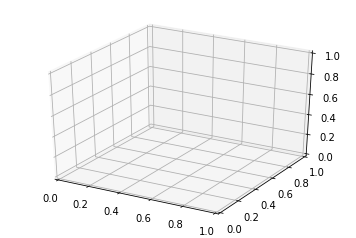

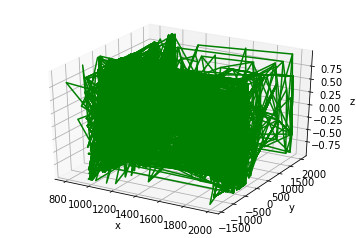

In [24]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

accX = df1['X (mg)']
accY = df1['Y (mg)']
accZ = df1['Z (mg)']

fig = plt.figure()
ax = plt.axes(projection="3d")
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

#x = np.linspace(-6, 6, 30)
#y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(accX, accY)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green', rstride = 2, cstride = 1, cmap = plt.cm.Blues_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()